In [3]:
import pandas as pd
import numpy as np

data = {'X': [1,3,5,7,9,11,13,15,17,19], 'Y': [3,3,7,7,11,11,15,15,19,19]}


In [4]:
df = pd.DataFrame(data)

df

,X,Y
0,1,3
1,3,3
2,5,7
3,7,7
4,9,11
5,11,11
6,13,15
7,15,15
8,17,19
9,19,19


In [5]:
from sklearn.linear_model import LinearRegression

ML = LinearRegression()

X = np.array(df['X']).reshape(-1,1)
y = df['Y']

ML.fit(X,y)


LinearRegression()

In [6]:
print('Intercept : \n', ML.intercept_)

print("Coeffecients : \n", ML.coef_)


Intercept : 
 1.3030303030303063
Coeffecients : 
 [0.96969697]


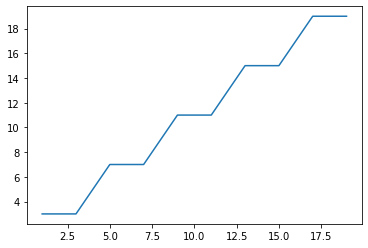

In [7]:
import matplotlib.pyplot as plt

plt.plot(X, y)

      X1     X2  Y
0 -3.980 -0.120  1
1 -3.464 -2.110  1
2 -3.461  1.890  1
3 -2.220 -3.474  1
4 -2.020  0.030  0
(25, 3)


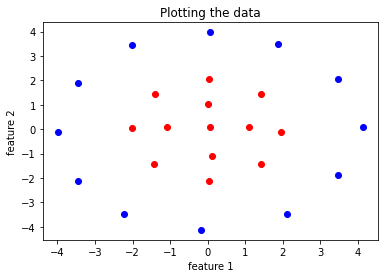

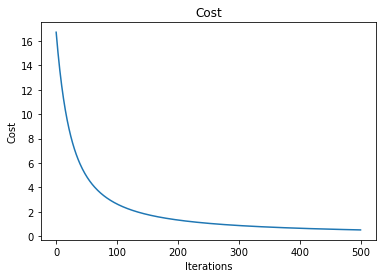

[[ 3.85656919e+00  3.85656919e+00  3.85656919e+00  3.85656919e+00
  -3.85656919e+00  3.85656919e+00 -3.85656919e+00 -3.85656919e+00
  -3.85656919e+00  3.85656919e+00 -3.85656919e+00 -3.85656919e+00
  -3.85656919e+00  3.85656919e+00 -3.85656919e+00 -3.85656919e+00
  -3.85656919e+00 -3.85656919e+00 -3.85656919e+00  3.85656919e+00
  -3.85656919e+00  3.85656919e+00  3.85656919e+00  3.85656919e+00
   3.85656919e+00]
 [-2.32432041e-04 -2.32432041e-04 -2.32432041e-04 -2.32432041e-04
   2.32432041e-04 -2.32432041e-04  2.32432041e-04  2.32432041e-04
   2.32432041e-04 -2.32432041e-04  2.32432041e-04  2.32432041e-04
   2.32432041e-04 -2.32432041e-04  2.32432041e-04  2.32432041e-04
   2.32432041e-04  2.32432041e-04  2.32432041e-04 -2.32432041e-04
   2.32432041e-04 -2.32432041e-04 -2.32432041e-04 -2.32432041e-04
  -2.32432041e-04]
 [-1.70541960e-03 -1.70541960e-03 -1.70541960e-03 -1.70541960e-03
   1.70541960e-03 -1.70541960e-03  1.70541960e-03  1.70541960e-03
   1.70541960e-03 -1.70541960e-03  1.7

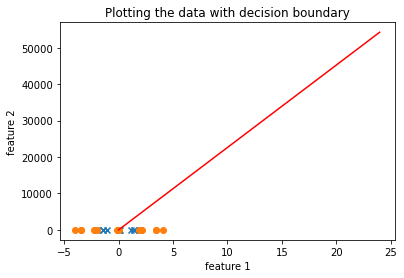

In [21]:
############################# Question - 3 ################################
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

def hypothesis(x,theta):
    h = np.dot(x,theta)
    return sigmoid(h)

def sigmoid(z):
    return 1/(1+np.exp(-z))


def cost(x,y,theta):
    m = x.shape[0]
    total_cost = (-1/m)*(np.sum((y*(np.log(hypothesis(x,theta))))+((1-y)*(np.log(1-hypothesis(x,theta))))))
    return total_cost

def gradient(x,y,theta):
    m = x.shape[0]
    return (1/m)*(np.dot(x.transpose(),(hypothesis(x,theta)-y)))

def gradient_descent(x,y,learning_rate,max_itr):
    m = x.shape[0]
    n = x.shape[1]
    
    ones = np.ones((m,1))
    x = np.hstack((ones,x))
    
    theta = np.zeros((n+1,1))
    cost_history = []
    
    for i in range(max_itr):
        theta = theta - learning_rate*gradient(x,y,theta)
        cost_history.append(cost(x,y,theta))
        
    return theta,cost_history


def plot_decision_boundary(x,y,theta):
    x_0 = data[data.Y==0].iloc[:,0:2]
    y_0 = data[data.Y==0].iloc[:,2]
    x_1 = data[data.Y==1].iloc[:,0:2]
    y_1 = data[data.Y==0].iloc[:,2]

    slope = -(theta[0] / theta[2])
    intercept = -(theta[1] / theta[2])
    x = np.arange(x.shape[0], step=1)
    y = slope * x + intercept
    plt.scatter(x_0.iloc[:, 0], x_0.iloc[:, 1], marker = 'x')
    plt.scatter(x_1.iloc[:, 0], x_1.iloc[:, 1], marker = 'o')
    plt.plot(x, y, '-r')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('Plotting the data with decision boundary')
    plt.show()







if __name__ == '__main__':

    x1 = [-3.98, -3.464,0-3.461,-2.22, -2.02, -2.01, -1.42, -1.416, -1.09, -0.19, 0.01, 0.03, 0.04, 0.06, 0.07, 0.12, 1.11, 1.411, 1.414, 1.86, 1.96, 2.11, 3.461, 3.464, 4.12]
    x2 = [-0.12, -2.11,  1.89, -3.474, 0.03, 3.459, -1.409, 1.419, 0.08, -4.13, 1.02, -2.12, 2.06, 3.97, 0.1, -1.12, 0.09, 1.419, -1.415, 3.47, -0.12, -3.472, -1.87, 2.07, 0.09]
    y = [1,1,1,1,0, 1, 0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1]
    data = pd.DataFrame({'X1':x1, 'X2':x2, 'Y':y})
    print(data.head(5))
    print(data.shape)

    x = data.iloc[:,0:2]
    y = data.iloc[:,2]

    y = y.values

    x = x.values

    plt.scatter(x[y==0,0],x[y==0,1],c='r')
    plt.scatter(x[y==1,0],x[y==1,1],c='b')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('Plotting the data')
    plt.show()

    learning_rate = 0.1

    max_itr = 500

    theta,cost_history = gradient_descent(x,y,learning_rate,max_itr)

    plt.plot(cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost")
    plt.show()

    print(theta)

    plot_decision_boundary(x,y,theta)



In [16]:
############################# Question - 4 ################################
import numpy as np
import pandas as pd

l=[[3.25,7.956,2],
[3.3,2.2,0],
[3.32,3.41,0],
[3.35,10.272,2],
[4.01,1.65,0],
[4.03,2.51,0],
[4.05,4.21,0],
[4.05,7.38,2],
[4.06,11.412,2],
[4.07,9.198,2],
[5.22,2.15,0],
[5.24,3.41,0],
[5.25,7.866,2],
[8.15,6.3,1],
[8.23,7.95,1],
[9.38,7.34,1],
[9.4,8.21,1],
[10.2,6.52,1],
[10.8,7.72,1],
[4.01,3.02,'?'],
[9.1,6.5,'?'],
[3.50,9.50,'?'],
[6.01,6.01,'?']]


df = pd.DataFrame(l, columns=['X1','X2','Y'])
df


,X1,X2,Y
0,3.25,7.956,2
1,3.30,2.200,0
2,3.32,3.410,0
3,3.35,10.272,2
4,4.01,1.650,0
5,4.03,2.510,0
6,4.05,4.210,0
7,4.05,7.380,2
8,4.06,11.412,2
9,4.07,9.198,2


In [17]:
for i in df.columns:
  df.loc[df[i]=='?',i]=np.nan

test_data = df[-4:]
train_data = df[:-4]


X = train_data[['X1','X2']]
y = train_data['Y'].astype('int')


In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
classifier_rf.fit(X, y)
classifier_rf.predict(test_data[['X1','X2']])

array([0, 1, 2, 2])

<AxesSubplot:xlabel='X1', ylabel='X2'>

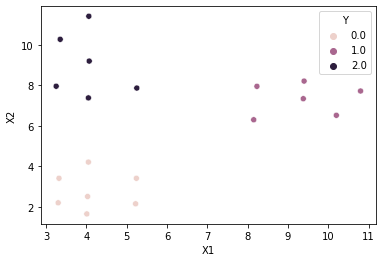

In [19]:
t = test_data[['X1','X2']]
#t['Y'] = pred

df = pd.concat([df[:-4],t])

import seaborn as sns
sns.scatterplot(x="X1", y="X2", hue='Y', data=df)

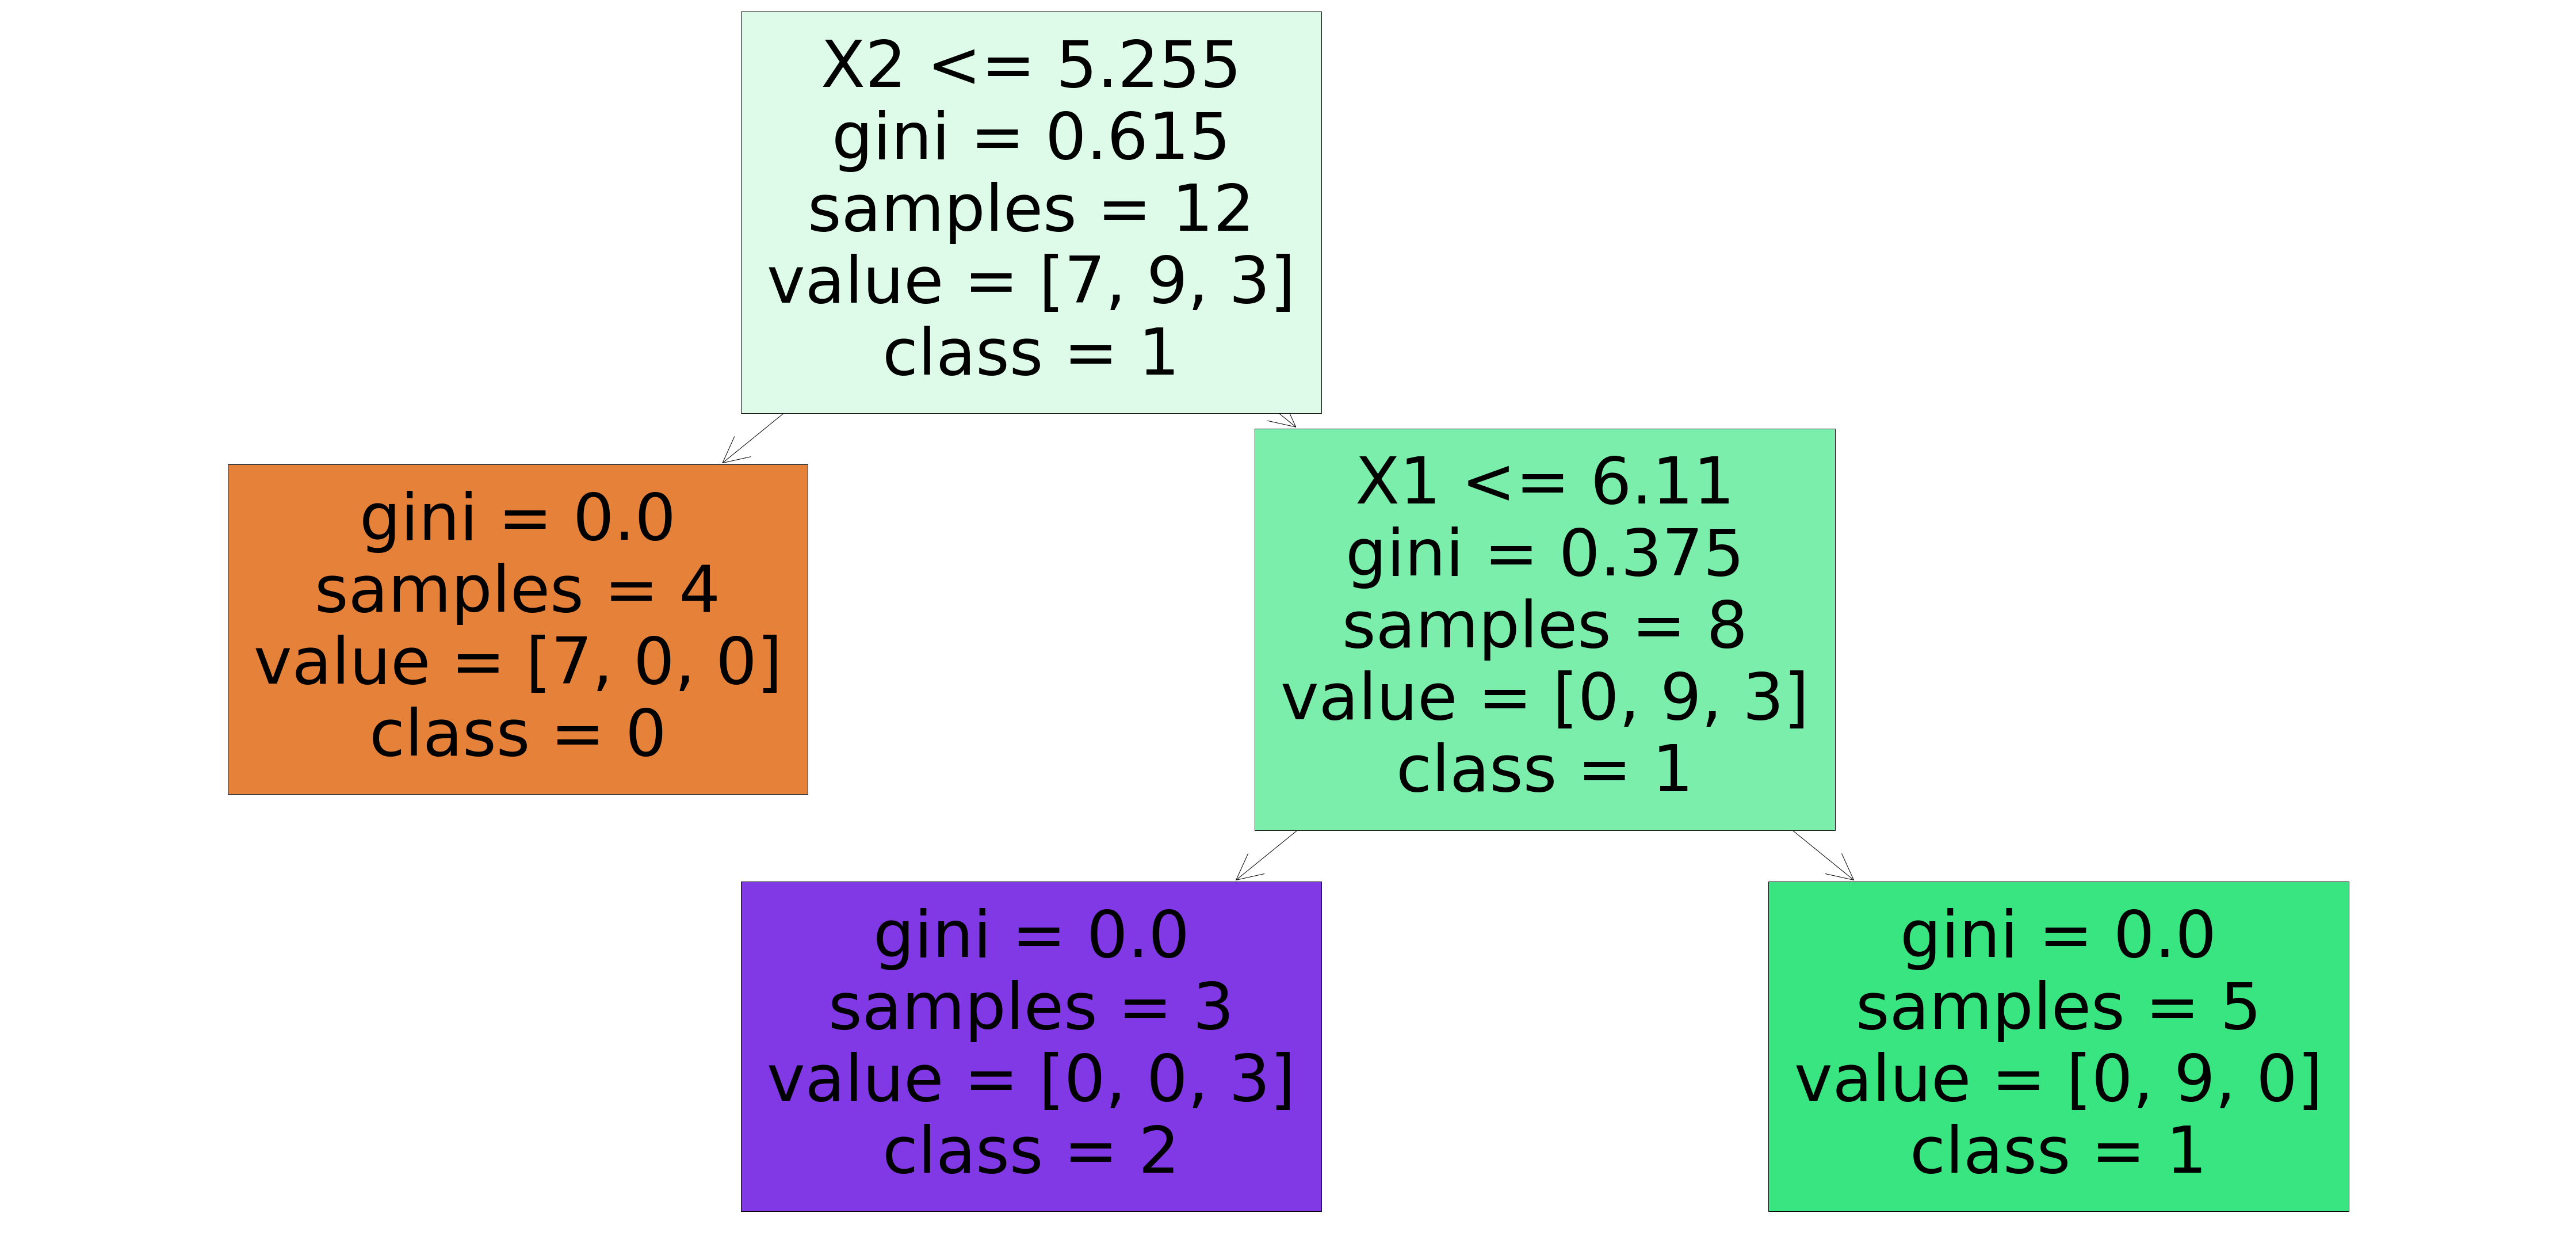

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[5], feature_names = df.columns,class_names=['0','1','2'],filled=True);